In [2]:
import cv2
from matplotlib import pyplot as plt

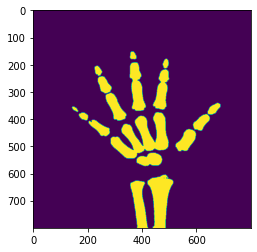

In [3]:
plt.imshow(cv2.imread('preds.png',0))

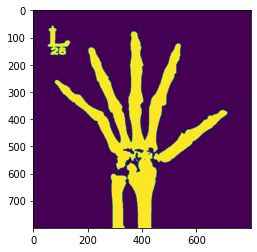

In [4]:
plt.imshow(cv2.imread('preds_val.png',0))

In [10]:
from keras.models import load_model
model = load_model('bone_annotation.h5')

In [11]:
model

In [17]:
from glob import glob
import cv2
test = glob('./Test/*')

test[:20]

['./Test/016_M.jpg',
 './Test/14_F.jpg',
 './Test/015_M.jpg',
 './Test/15_F.jpg',
 './Test/018_M.jpg']

In [25]:
import numpy as np
from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize

X_test = np.zeros((len(test),800,800), dtype= np.uint8)
sizes_test = []
for n, id_ in tqdm(enumerate(test), total = len(test)):
    img_ = cv2.imread(id_,0)
    
    hist, bins = np.histogram(img_.flatten(), 256,[0,256])

    cdf = hist.cumsum()

    # cdf의 값이 0인 경우는 mask처리를 하여 계산에서 제외
    # mask처리가 되면 Numpy 계산에서 제외가 됨
    # 아래는 cdf array에서 값이 0인 부분을 mask처리함
    cdf_m = np.ma.masked_equal(cdf,0)

    #History Equalization 공식
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())

    # Mask처리를 했던 부분을 다시 0으로 변환
    cdf = np.ma.filled(cdf_m,0).astype('uint8')

    img = cdf[img_]
    
    sizes_test.append([img_.shape[0], img_.shape[1]])
    img = resize(img_, (800,800), mode = 'constant', preserve_range = True)
    X_test[n] = img

print('Done')

100%|██████████| 5/5 [00:00<00:00, 17.83it/s]

Done


In [26]:
model

In [27]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 800, 800, 1  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 800, 800, 1)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 800, 800, 16  160         ['lambda[0][0]']                 
                                )                                                                 
                                                                                              

In [28]:
preds_test = model.predict(X_test, verbose =1)

1/1 [==============================] - 0s 19ms/step


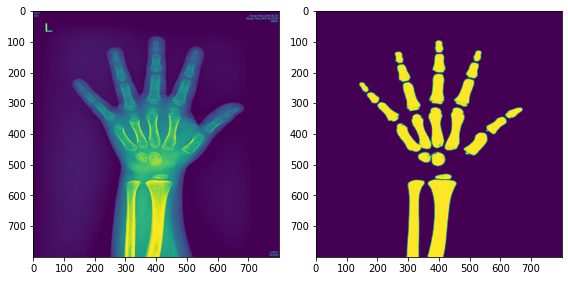

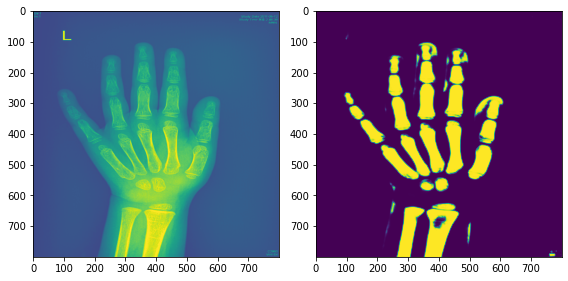

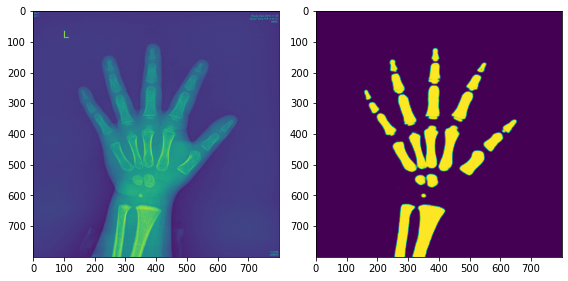

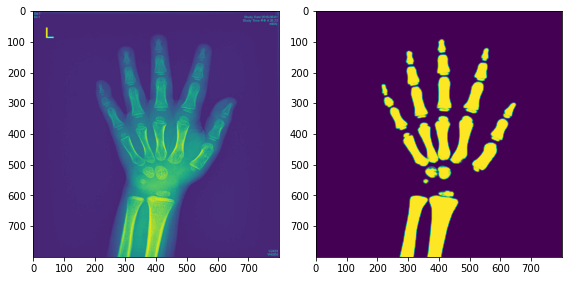

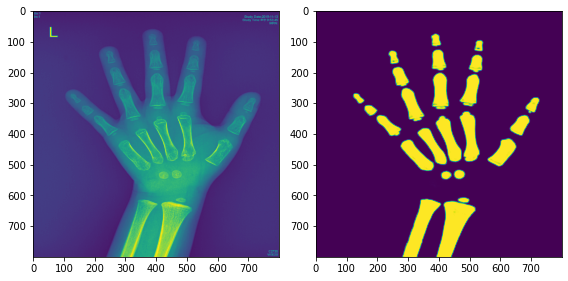

In [29]:
for i in range(5):
    img_1 = X_test[i]
    img_2 = np.squeeze(preds_test[i])

    f, ax = plt.subplots(1, 2, figsize=(8,8))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    f.tight_layout()
    plt.show()